# Assignment 6

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Making everything "up to" the green line

In [2]:
# Create the grid and initial conditions
imax = 1000             # number of grid points in x-direction
delx = 100.             # horizontal grid spacing (m)
delt = 10.              # time increment (s)
u = 5.                  # horizontal wind speed (m/s)
index = np.arange(0,imax)

In [3]:
# 1) Calculate and display the Courant number.
# C ≡ u∆t/∆x
cr = (u*delt)/delx
cr

0.5

In [4]:
# Create initial concentration anomaly distribution in the x-direction (blue)
conc = np.zeros(imax)   # initial concentration of background is zero
cmax = 10.0                     # max initial concentration
conc[100:151] = np.linspace(0,cmax,51)         # insert left side of the upward triangle
conc[150:201] = np.linspace(cmax,0,51)         # insert right side of upward triangle
conc[20:41] = np.linspace(0., -0.5*cmax,21)    # insert left side of downward triangle
conc[40:61] = np.linspace(-0.5*cmax, 0.,21)    # insert right side of downward triangle

In [5]:
# Create initial concentration anomaly under a different name so that you can plot it later (blue)
conc_init = np.zeros(imax)   # initial concentration of background is zero
cmax = 10.0                     # max initial concentration
conc_init[100:151] = np.linspace(0,cmax,51)         # insert left side of the upward triangle
conc_init[150:201] = np.linspace(cmax,0,51)         # insert right side of upward triangle
conc_init[20:41] = np.linspace(0., -0.5*cmax,21)    # insert left side of downward triangle
conc_init[40:61] = np.linspace(-0.5*cmax, 0.,21)    # insert right side of downward triangle

In [6]:
# Show the exact solution (red)
cideal = np.zeros(imax)   # final concentration of ideal background is zero, except as given below:
cideal[800:851] = np.linspace(0., cmax, 51)    # insert left side of positive triangle
cideal[850:901] = np.linspace(cmax, 0., 51)    # insert right side of positive triangle
cideal[720:741] = np.linspace(0., -0.5*cmax, 21)    # insert left side of negative triangle
cideal[740:761] = np.linspace(-0.5*cmax, 0., 21)    # insert right side of negative triangle

In [7]:
# Calculate the number of timesteps
nsteps = (imax - 300) / (u * delt / delx)

Text(0, 0.5, 'Quantity')

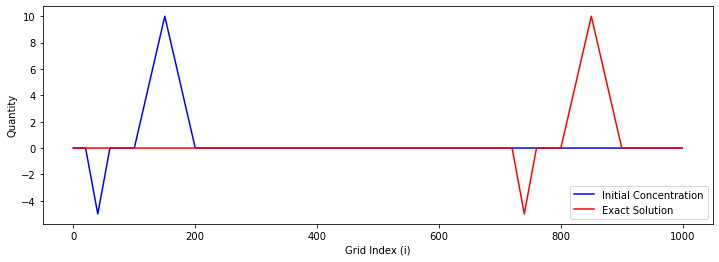

In [8]:
# checking that the lines look good before using the various advection schemes
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(index,conc,'b',label='Initial Concentration')
ax.plot(index,cideal,'r',label='Exact Solution')
ax.legend()
ax.set_xlabel('Grid Index (i)')
ax.set_ylabel('Quantity')

## FTBS

In [9]:
# Create initial concentration anomaly distribution in the x-direction (blue)
conc = np.zeros(imax)   # initial concentration of background is zero
cmax = 10.0                     # max initial concentration
conc[100:151] = np.linspace(0,cmax,51)         # insert left side of the upward triangle
conc[150:201] = np.linspace(cmax,0,51)         # insert right side of upward triangle
conc[20:41] = np.linspace(0., -0.5*cmax,21)    # insert left side of downward triangle
conc[40:61] = np.linspace(-0.5*cmax, 0.,21)    # insert right side of downward triangle

In [10]:
conc_temp = np.zeros(len(conc))
for n in np.arange(0,nsteps):                  # for each time step n
    for i in np.arange(1,imax-1):           # for each interior grid point i
        
        conc_temp[i] = conc[i] - (conc[i]-conc[i-1])*cr
    conc = conc_temp
    conc_temp = np.zeros(len(conc))

Text(0.5, 1.0, 'Forward in Time Backward in Space, for Cr = 0.5')

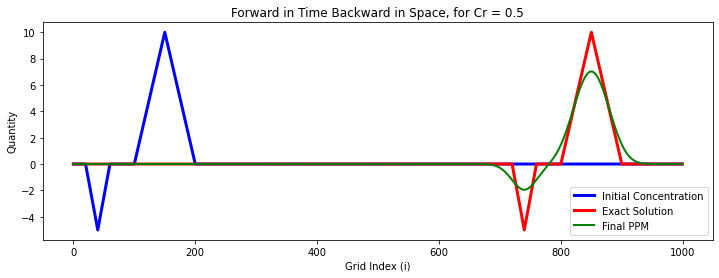

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(index,conc_init,'b',lw = 3, label='Initial Concentration')
ax.plot(index,cideal,'r',lw = 3, label='Exact Solution')
ax.plot(index,conc,'g',lw = 2, label='Final PPM')
ax.legend()
ax.set_xlabel('Grid Index (i)')
ax.set_ylabel('Quantity')
ax.set_title('Forward in Time Backward in Space, for Cr = 0.5')

Text(0.5, 1.0, 'Forward in Time Backward in Space, for Cr = 0.5')

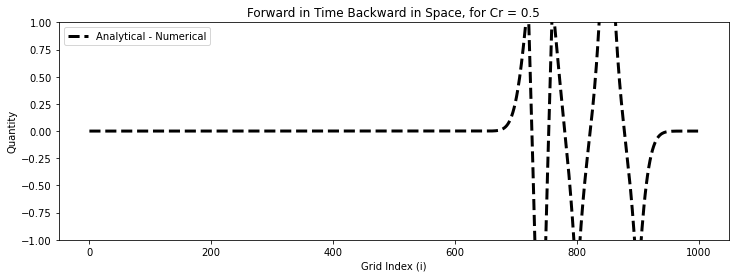

In [12]:
#plot difference with actual solution
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(index,cideal - conc,'k--',lw = 3, label='Analytical - Numerical')
ax.legend()
ax.set_ylim([-1,1])
ax.set_xlabel('Grid Index (i)')
ax.set_ylabel('Quantity')
ax.set_title('Forward in Time Backward in Space, for Cr = 0.5')

## RK3

In [13]:
def RK3(c,cp1,cm1,cp2,cm2,cp3,cm3,cr):
    cnew = (1-((cr**2)/4))*c - ((cr/2)-((3/48)*(cr**3)))*(cp1-cm1) + (((cr**2)/8))*(cp2+cm2) - ((cr**3)/48)*(cp3-cm3)
    return cnew

In [14]:
# Create initial concentration anomaly distribution in the x-direction (blue)
conc = np.zeros(imax)   # initial concentration of background is zero
cmax = 10.0                     # max initial concentration
conc[100:151] = np.linspace(0,cmax,51)         # insert left side of the upward triangle
conc[150:201] = np.linspace(cmax,0,51)         # insert right side of upward triangle
conc[20:41] = np.linspace(0., -0.5*cmax,21)    # insert left side of downward triangle
conc[40:61] = np.linspace(-0.5*cmax, 0.,21)    # insert right side of downward triangle

In [15]:
conc_temp = np.zeros(len(conc))
for n in np.arange(0,nsteps):                  # for each time step n
    for i in np.arange(2,imax-3):           # for each interior grid point i
        
        conc_temp[i] = RK3(conc[i],conc[i+1],conc[i-1],conc[i+2],conc[i-2],conc[i+3],conc[i-3],cr)
    conc = conc_temp
    conc_temp = np.zeros(len(conc))
#     print(min(conc))

Text(0.5, 1.0, 'Runge-Kutta 3, for Cr = 0.5')

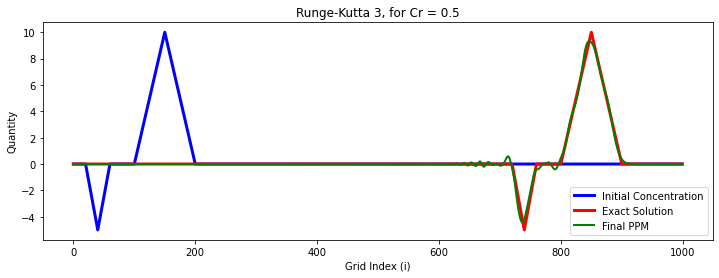

In [16]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(index,conc_init,'b',lw = 3, label='Initial Concentration')
ax.plot(index,cideal,'r',lw = 3, label='Exact Solution')
ax.plot(index,conc,'g',lw = 2, label='Final PPM')
ax.legend()
ax.set_xlabel('Grid Index (i)')
ax.set_ylabel('Quantity')
ax.set_title('Runge-Kutta 3, for Cr = 0.5')

Text(0.5, 1.0, 'Runge-Kutta 3, for Cr = 0.5')

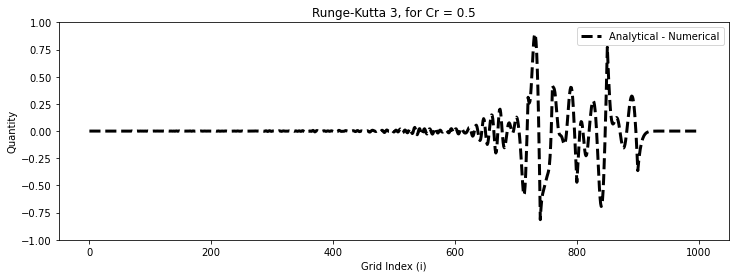

In [17]:
#plot difference with actual solution
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(index,cideal - conc,'k--',lw = 3, label='Analytical - Numerical')
ax.legend()
ax.set_ylim([-1,1])
ax.set_xlabel('Grid Index (i)')
ax.set_ylabel('Quantity')
ax.set_title('Runge-Kutta 3, for Cr = 0.5')

## PPM

In [18]:
# Create initial concentration anomaly distribution in the x-direction (blue)
conc = np.zeros(imax)   # initial concentration of background is zero
cmax = 10.0                     # max initial concentration
conc[100:151] = np.linspace(0,cmax,51)         # insert left side of the upward triangle
conc[150:201] = np.linspace(cmax,0,51)         # insert right side of upward triangle
conc[20:41] = np.linspace(0., -0.5*cmax,21)    # insert left side of downward triangle
conc[40:61] = np.linspace(-0.5*cmax, 0.,21)    # insert right side of downward triangle

In [19]:
# ================================
# 6) Use the HPPM method from CMAQ
# CW refers to the paper by Colella and Woodward.

# 1-D domain covers grid points i = 1 to imax.  But 1 and imax are boundary-
# condition cells.  The main interior computation is for i = 2 to (imax-1).

# Pre-calculate some constants
sixth = 1.0/6.0
two3rds = 2.0/3.0
oneoverdelx = 1.0 / delx

# Allocate the vectors
dc = np.zeros(imax)       # nominal difference in concentration across a cell
clfirst = np.zeros(imax)  # first guess of conc at left edge of cell i
cr = np.zeros(imax)       # conc at right edge of cell i
cl = np.zeros(imax)       # conc at left edge of cell i
c6 = np.zeros(imax)       # this corresponds to parabola parameter a6 of CW eq.(1.4)
FL = np.zeros(imax)       # pollutant flux into the left side of a grid cell
FR = np.zeros(imax)       # pollutant flux into the right side of a grid cell

# Iterate forward in time
for n in np.arange(0,nsteps):                  # for each time step n
    # To guarantee that solution is monotonic, check that the left edge of cell i 
    #    (which is between cells i and i-1) should not have a concentration lower  
    #    or higher than the concentrations in those two neighboring cells
    #    Namely, is clfirst between c[i] and c[i-1].  If not, then fix.
    for i in np.arange(1,imax-1):           # for each interior grid point i
        del_cl = conc[i] - conc[i-1]    # concentration difference with cell at left
        del_cr = conc[i+1] - conc[i]    # concentration difference with cell at right
        dc[i] = 0.5*(del_cl + del_cr)   # 1st guess of avg conc difference across cell i
        if (del_cl*del_cr)>0:      # then revise average difference across cell i
            dc[i] = np.sign(dc[i]) * np.min( [abs(dc[i]) , 2*abs(del_cl) , 2*abs(del_cr)] ) 
        else:
            dc[i]=0.0              # for the special case of constant conc across cell
    
    # First guess for concentration at left edge of each cell, using revised dc value
    for i in np.arange(1,imax-1):           # for each interior grid point i
        clfirst[i] = 0.5*(conc[i]+conc[i-1]) - sixth*(dc[i]-dc[i-1])
    
    # find parameters for the piecewise-continuous parabola in cell i
    for i in np.arange(1,imax-1):          # for each interior grid point i
        
        # conc at the right edge (cr) of cell i equals concen at left edge of cell i+1
        cr[i] = clfirst[i+1]            # concentration at right edge of cell i
        cl[i] = clfirst[i]              # concentration at left edge of cell i
        
        # Check whether cell i is an extremum (is a peak or valley in the conc plot)
        if ((cr[i]-conc[i]) * (conc[i] - cl[i]))    > 0.0 :  # then not extremum
            
            # Find the two coefficients of the parabola: dc and c6:  
            dc[i] = cr[i] - cl[i]       # updated concen diff. between right and left edges
            c6[i] = 6*( conc[i] - 0.5*(cl[i]+cr[i]) )
            
            if (dc[i]*c6[i]) > (dc[i]*dc[i]) : # then adjust for overshoot at left edge
                cl[i] = 3.0*conc[i] - 2.0*cr[i]
            elif (-dc[i]*dc[i]) > (dc[i]*c6[i]):  # then adjust for overshoot at right
                cr[i] = 3.0*conc[i] - 2.0*cl[i]
            
        else:                       # For an extremum, don't use a parabola.
            cl[i] = conc[i]             # Instead, assume concen is constant across the cell,
            cr[i] = cl[i]               # Thus, left and right concentrations equal average conc.
            
        # second guess of coefficients for the parabola, from CW eq. (1.5)
        dc[i] = cr[i] - cl[i]       
        c6[i] = 6.0*(conc[i] - 0.5*(cl[i] + cr[i]))
    
    
    # Initialize to 0 the fluxes into the left and right sides of cell i
    FL = np.zeros(imax)
    FR = np.zeros(imax)
    
    
    # Next, use parabolic fits within each cell to calculate the fluxes betweeen cells
    
    # At left side of whole domain (i = 1), assume constant flux. Use FR[1] = FR[2]
    if u > 0 :                      # if wind enters left boundary of domain
        y = u*delt                      # distance traversed by wind during delt
        x = y*oneoverdelx               # Courant number is fraction of grid cell traversed
        # Find the flux leaving the right side of left boundary cell
        FR[1] = y*( cr[2] - 0.5*x*(dc[2] - c6[2]*(1.0 - two3rds*x))  )    # parabolic in x
        
    # In interior of whole domain, use parabola eqs. CW (1.12) to find the fluxes
    for i in np.arange(1,imax-1) :             # for each interior grid point i
        
        if u < 0.0 :                  # for wind from right to left
            y = -u*delt                 # distance traversed by wind during delt
            x = y*oneoverdelx           # Courant number is fraction of grid cell traversed
            FL[i] = y*( cl[i] + 0.5*x*(dc[i] + c6[i]*(1.0 - two3rds*x))  )   # parabolic in x
        
        if u > 0.0 :                  # for wind from left to right
            y = u*delt                  # distance traversed by wind during delt
            x = y*oneoverdelx           # Courant number is fraction of grid cell traversed
            FR[i] = y*( cr[i] - 0.5*x*(dc[i] - c6[i]*(1.0 - two3rds*x))  )   # parabolic in x
        
    
    # At right side of whole domain (i = imax), assume const. flux. Use FL[imax] = FL[imax-1]
    if u < 0 :                      # if wind enters right boundary of domain
        y = -u*delt                     # distance traversed by wind during delt
        x = y*oneoverdelx               # Courant number is fraction of grid cell traversed
        FL[imax] = y*( cl[imax-1] + 0.5*x*(dc[imax-1] + c6[imax-1]*(1.0 - two3rds*x))  )
    
    
    # For a realistic case, you would want to impose the actual fluxes at the boundaries.
    # But for our simple HW, impose boundry conditions of zero pollutant flux entering the domain.
    if u > 0:
        FR[1] = 0.0
    if u < 0:
        FL[1] = 0.0
    
    
    # Update the concentrations in each grid cell.  *** This is the forecast equation.***
    
    for i in np.arange(1,imax-1) :             # for each interior grid point i
        conc[i] = conc[i] + oneoverdelx* (FR[i-1] - FR[i] + FL[i+1] - FL[i])  # CW eq. 1.13

Text(0.5, 1.0, 'Piecewise Parabolic Method, for Cr = 0.5')

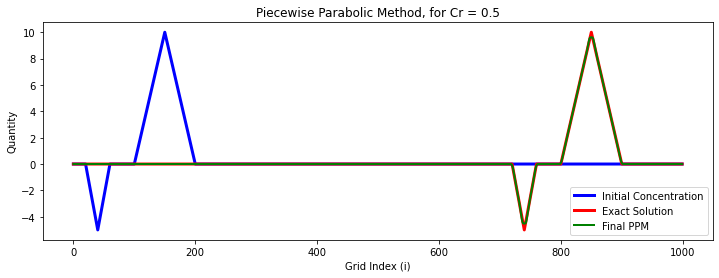

In [20]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(index,conc_init,'b',lw = 3, label='Initial Concentration')
ax.plot(index,cideal,'r',lw = 3, label='Exact Solution')
ax.plot(index,conc,'g',lw = 2, label='Final PPM')
ax.legend()
ax.set_xlabel('Grid Index (i)')
ax.set_ylabel('Quantity')
ax.set_title('Piecewise Parabolic Method, for Cr = 0.5')

Text(0.5, 1.0, 'Piecewise Parabolic Method, for Cr = 0.5')

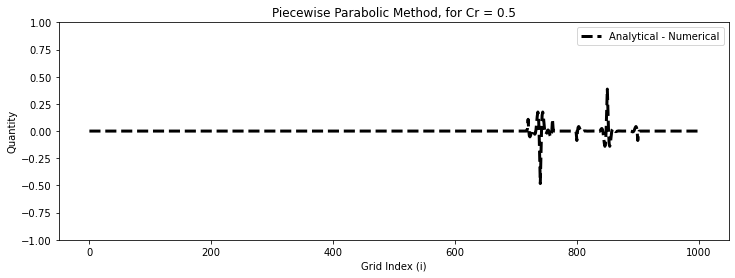

In [21]:
#plot difference with actual solution
fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(index,cideal - conc,'k--',lw = 3, label='Analytical - Numerical')
ax.legend()
ax.set_ylim([-1,1])
ax.set_xlabel('Grid Index (i)')
ax.set_ylabel('Quantity')
ax.set_title('Piecewise Parabolic Method, for Cr = 0.5')

##  Discuss and compare the results of these three advection schemes.

All three advection schemes have a dampennning effect on the signal; FTBS with most and PPM the least, shown by the difference plot made for each solution. FTBS and PPM simply have dampenned waves at the end of stepping forwards, while small oscillations are introduced in the RK3 solution (that if you have a large number of steps foreward begin to get large). While PPM is the closest match it takes noticeably longer to run for even this simple demonstration so RK3 may be a better choice dempening on your purposes.